In [3]:
from preprocessing import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from utils import load_points

In [127]:
dataset_idx, image_idx = 0, 0
path = "./training/dataset0%d/vessel%s/reference.txt" % (dataset_idx, str(image_idx))
points = load_points(path)
reference_points = load_reference_points("./preprocessing/reference_directions.txt")

idx = 200
radius = points[idx, 3]
point = points[idx, :3]
directions_label = np.zeros(D, dtype="float32")

for i in range(50, 201):
    distance = calculate_distance(point, points[idx + i, :3])
    if distance > radius:
        print("forward: %.5f" % distance)
        forward_idx = idx + i
        break
forward_d = find_direction_cat(point, points[forward_idx, :3], reference_points)
directions_label[forward_d] = 0.5

for i in range(0, 201):
    assert idx - i > 0, "the selected point is too close to the start/end of the artery"
    distance = calculate_distance(point, points[idx - i, :3])
    if distance > radius:
        print("backward: %.5f" % distance)
        backward_idx = idx - i
        break
backward_d = find_direction_cat(point, points[backward_idx, :3], reference_points)
directions_label[backward_d] = 0.5

forward: 2.69136
backward: 2.66930


[-0.58106579 -0.46773041 -0.66602613] [-0.57866956 -0.45810497 -0.67474542]


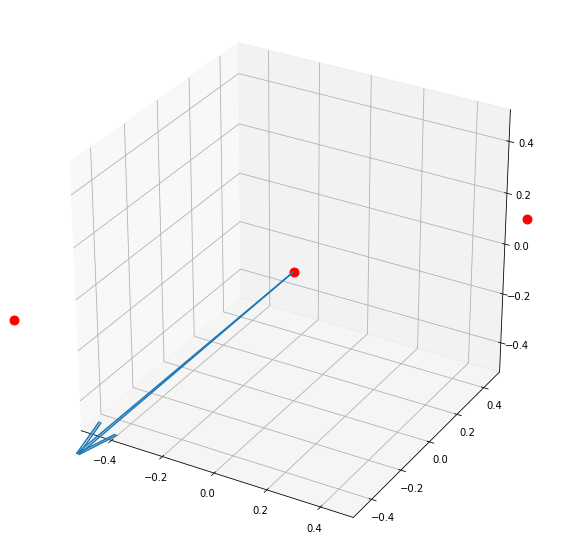

In [128]:
f_point, b_point = points[forward_idx, :3].copy(), points[backward_idx, :3].copy()
f_point -= point
b_point -= point
f_point /= np.linalg.norm(f_point)
b_point /= np.linalg.norm(b_point)
print(f_point, b_point)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.scatter(0, 0, 0, s=80, c="r")
for r_point in [reference_points[forward_d], reference_points[backward_d]]:
    ax.scatter(r_point[0], r_point[1], r_point[2], s=80, c="r")
    
ax.quiver(0, 0, 0, f_point[0], f_point[1], f_point[2], arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, b_point[0], b_point[1], b_point[2], arrow_length_ratio=0.15)
# ax.scatter(b_point[0], b_point[1], b_point[2], s=80, c="b")

ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])
plt.show()

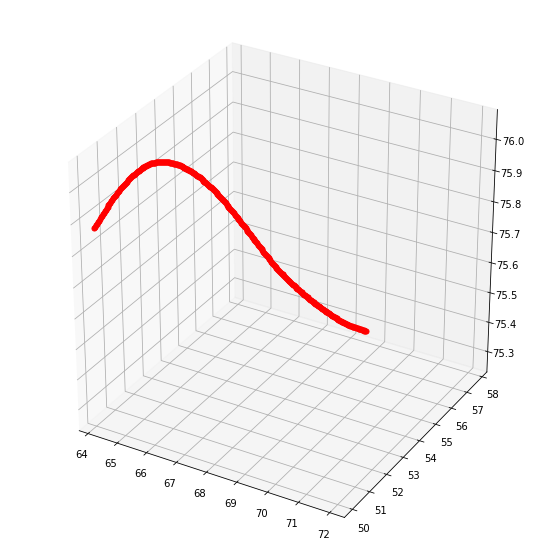

In [126]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(10,10))

# for i in range(backward_idx, forward_idx + 1):
for i in range(0, 300):
    x, y, z = points[i, :3]
    r = points[i, 3]
    if i == idx:
        ax.scatter(x, y, z, s=r*80, c="b")
    if (i == forward_idx) or (i == backward_idx):
        ax.scatter(x, y, z, s=r*80, c="y")
    ax.scatter(x, y, z, s=r*10, c="r")
    
plt.axis("square")
plt.show()

In [101]:
np.sum([calculate_distance(points[i-1, :3], points[i, :3]) for i in range(1, len(points))])

220.57404199770534

In [49]:
len(np.unique(points[:, :3], axis=0)), len(points)

(7354, 7354)

In [50]:
points[:, :3][forward_idx] == points[:, :3][backward_idx]

array([False, False, False])

In [52]:
points[:, :3][forward_idx], points[:, :3][backward_idx]

(array([-0.77113795, -0.40252453, -0.49327503]),
 array([-0.77113795, -0.40252453, -0.49327503]))